# Welcome to the Transformer Tutorial 🚀🚀🚀🚀🚀🚀🚀🚀🚀

Today you will learn to the nuts and bolts of Transformer Models. Transformers have revolutionized the field of natural language processing (NLP) and beyond.

# Translation model

Our task today will be to implement a translation tool using the power of transformer models.

Let us get our feet wet by loading the dataset in useful form ;-)

In [ ]:
# change path to data. Download data from: https://www.manythings.org/anki/ deu-eng.zip
with open('deu.txt') as f: 
    lines = f.read().split("\n")[:-1]
text_pairs = [] 
for line in lines:
    eng, ger, _ = line.split("\t")
    eng = eng.lower()
    ger = ger.lower()
    text_pairs.append((eng, ger))

Due to time and computational constraint we will only work on a subset of data and let us fix the test set with samples!

In [ ]:
# Consider only a subset 
data = text_pairs[:50000]

# Now let us fix test instances accross data
test_instances10K = [265, 473, 675, 1023, 1349, 2389, 3940, 4567, 4757, 5032, 5222, 5666, 6389, 6677, 7543, 7989, 8345, 8835, 9278, 9876]
test_instances20K = [10285, 10499, 10979, 11023, 11349, 12389, 13940, 14567, 14757, 15002, 15332, 15836, 16389, 16677, 17543, 17989, 18345, 18835, 19278, 19876]
test_instances30K = [20295, 20419, 20679, 21023, 21343, 22389, 23940, 24567, 24757, 25092, 25312, 25836, 26333, 26611, 27591, 27999, 28345, 28835, 29228, 29888]
test_instances40K = [30200, 30555, 30787, 31250, 31643, 32389, 33940, 34567, 34752, 35091, 35312, 35636, 36111, 36622, 37591, 37888, 38295, 38812, 39123, 39458]
test_instances50K = [40389, 40678, 40987, 41456, 41683, 42734, 43989, 44567, 44752, 45091, 45312, 45636, 46111, 46622, 47591, 47888, 48295, 48812, 49123, 49458]

# Aggregate instances 
test_instances = []
test_instances.extend(test_instances10K)
test_instances.extend(test_instances20K)
test_instances.extend(test_instances30K)
test_instances.extend(test_instances40K)
test_instances.extend(test_instances50K)

# Get train_validation and test subset
train_validation_data = []
test_data = []
for i in range(len(data)):
    if i not in test_instances:
        train_validation_data.append(data[i])
    else:
        test_data.append(data[i])

Let us print first five samples and last five samples to get a feeling for the dataset!

In [ ]:
# Your code here 


Hooray, we got a sneak peak of the data. Now Split data into training and validation set. Let us do the usual 95/5 split. Hint: Use train_test_split from sklearn!

In [ ]:
# Your code here 



Let us prepare the datasets and load them into lists. 

In [ ]:
# train
X_train = [train_data[_][0] for _ in range(len(train_data))]
Y_train = [train_data[_][1] for _ in range(len(train_data))]

# validation
# Your code:


# test
# Your code:



Now, let us now remove sentences which have rare caracteres to make the training easier and faster. We want to create a solid translator for usual case!

In [ ]:
list_remove = ['"', '$', '%', '\xa0', '½', 'ï', 'á', 'é', 'ō', '\u200b', '–', '—', '\u202f'] 

for remove_char in list_remove:
    for idx, elem in enumerate(Y_train):
        if remove_char in elem:
            del X_train[idx]
            del Y_train[idx]

    for idx, elem in enumerate(Y_validation):
        if remove_char in elem:
            del X_validation[idx]
            del Y_validation[idx]


    for idx, elem in enumerate(Y_test):
        if remove_char in elem:
            del X_test[idx]
            del Y_test[idx]

for remove_char in list_remove:
    for idx, elem in enumerate(X_train):
        if remove_char in elem:
            del X_train[idx]
            del Y_train[idx]

    for idx, elem in enumerate(X_validation):
        if remove_char in elem:
            del X_validation[idx]
            del Y_validation[idx]


    for idx, elem in enumerate(X_test):
        if remove_char in elem:
            del X_test[idx]
            del Y_test[idx]

## Tokenizers in Natural Language Processing

Now that we came so far, let us tokenize the text to subword tokens. This is super important for the training. We will make use of a already trained tokenizer Spacy. 

### Overview
Tokenization is a fundamental step in most natural language processing (NLP) pipelines. It involves breaking down text into smaller units, typically words or subwords. These units are referred to as tokens.

### Process
The general process of tokenization can be described with the following steps:

1. **Input**: A string of text.
2. **Tokenization**: The text is split into tokens based on certain rules or patterns.

### Example
Consider the sentence: "Hello, world!". Using a basic whitespace tokenizer, the tokenization process can be represented mathematically as follows:


T("Hello, world!") = ["Hello,", "world!"]


This demonstrates how the tokenizer splits the input text into tokens based on spaces, treating punctuation as part of the adjacent token.

### Advanced Tokenization
In more sophisticated NLP models, such as those used in machine translation or sentiment analysis, tokenization might also involve recognizing punctuation, special characters, or using models that understand the morphology of the words.

### Libraries and Tools
Common libraries for tokenization in Python include:
- **spaCy**: Highly efficient and easy-to-use.
- **nltk**: Offers a wide range of tools and tokenizers for various languages.
- **Hugging Face's Transformers**: Provides advanced models that include tokenizers for modern NLP tasks.

In [ ]:
import spacy
from torchtext.data.utils import get_tokenizer

# Define your source and target languages
SRC_LANGUAGE = 'en'
TGT_LANGUAGE = 'de'  

# Load spaCy models
spacy_en = spacy.load('en_core_web_sm')
spacy_de = spacy.load('de_core_news_sm')  

# Initialize the dictionary for token transformers
token_transform = {}

token_transform[SRC_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')
token_transform[TGT_LANGUAGE] = get_tokenizer('spacy', language='de_core_news_sm')


### Tokenization Function

The `yield_tokens` function is designed to process an iterable collection of text data, applying a tokenization process specific to a given language. Below is the function's definition and its usage within Python code.


In [ ]:
from typing import Iterable, List

def yield_tokens(data_iter: Iterable[str], language: str) -> List[str]:
    for data_sample in data_iter:
        yield token_transform[language](data_sample)

### Setup for Tokenization and Vocabulary Building

This section outlines the process of setting up tokenization and vocabulary building for NLP models, using the `torchtext` library. 

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

english_data = X_train.copy()
german_data = Y_train.copy()

train_data = {
    SRC_LANGUAGE: english_data,
    TGT_LANGUAGE: german_data
}

from collections import Counter

# Define special symbols and their indices
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

# Create vocabularies using a helper function to convert token lists into a flat generator
vocab_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Build vocab from iterator and add special symbols
    vocab_transform[ln] = build_vocab_from_iterator(
        yield_tokens(train_data[ln], ln),
        min_freq=1,
        specials=special_symbols,
        special_first=True
    )
    
    # Set default index for unknown tokens
    vocab_transform[ln].set_default_index(0)  # Assuming '<unk>' is at index 0

## Dataset and DataLoader

Tokenization is done! Let us now prepare the data loader for training. Fortunately, we can make use of torch library for that. Let us import some useful packages!

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

That seemed to have worked. Now let us define the dataset and dataloader. 

* Todo
  * Tokenize sentences to subword tokens
  * Numeralisation of tokens to machine useable form (basically each token has its own fix id)
  * Add special tokens if needed (definitely start and end of sentence tokens)
  * Perform paddind for batch generation


In [ ]:
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
class TranslationDataset(Dataset):
    def __init__(self, english_sentences, german_sentences):
        self.english_sentences = english_sentences
        self.german_sentences = german_sentences
        
    def __len__(self):
        return len(self.english_sentences)
    
    def __getitem__(self, idx):
        # Source sentence
        source_tokens = token_transform[SRC_LANGUAGE](self.english_sentences[idx]) 
        source_sentence = [BOS_IDX] + [vocab_transform[SRC_LANGUAGE][token] for token in source_tokens] + [EOS_IDX]
        source_length = len(source_sentence)
        
        # Target sentence
        # Your code here:
        
        
        return torch.tensor(source_sentence), torch.tensor(target_sentence), source_length, target_length
        
dataset_train = TranslationDataset(X_train, Y_train)

def collate_fn(data):
    source, target, source_lengths, target_lengths = zip(*data)
    
    # Pad source sentences
    max_source_length = max(source_lengths)
    source = torch.stack([torch.nn.functional.pad(s, pad=(0, max_source_length - s.size(0)), value=PAD_IDX) for s in source])
    
    # Pad target sentences
    # Your code here:
    
    
    return source, target

dataloader_train = DataLoader(dataset_train, batch_size=192, shuffle=True, collate_fn=collate_fn)


Now your turn! We need a dataloader for the validation set, please implement it?

In [ ]:
# Your code here:



Question 1: We have implemented the padding of sequences to maximum sequence length of the batch, what other strategy can you think and why would you use them? 

## Transformer architecture build

So far done:
 - Dataset download
 - Preporcessing
 - Dataset and DataLoader

Now let us build the Transformer model which will be useful through-out the lab!

### Scaled Dot Product

Let us start by implementing scaled dot product. (Source: Ashish Vaswani et al.: Attention Is All You Need)

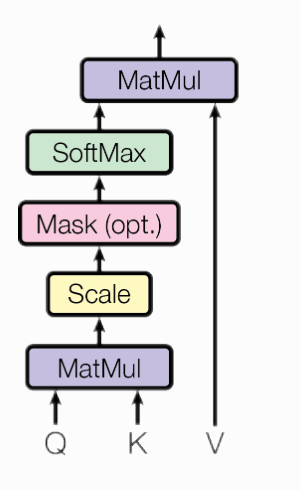

The scaled dot-product attention is computed as:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right) V
$$

Where:
- \( Q \) is the query matrix.
- \( K \) is the key matrix.
- \( V \) is the value matrix.
- \( $d_k$ \) is the dimension of the key vectors.


In [ ]:
def scaled_dot_product(k, v, q, mask=None):
    # Your code here: 
    
    
    
    return values, attention

Question 2: Why do we need a mask? 

### Multi-Head Attention

Hoooray, first contact with transformer was not that bad ;-). Now let us move to multi-head attention! (Source: Ashish Vaswani et al.: Attention Is All You Need)

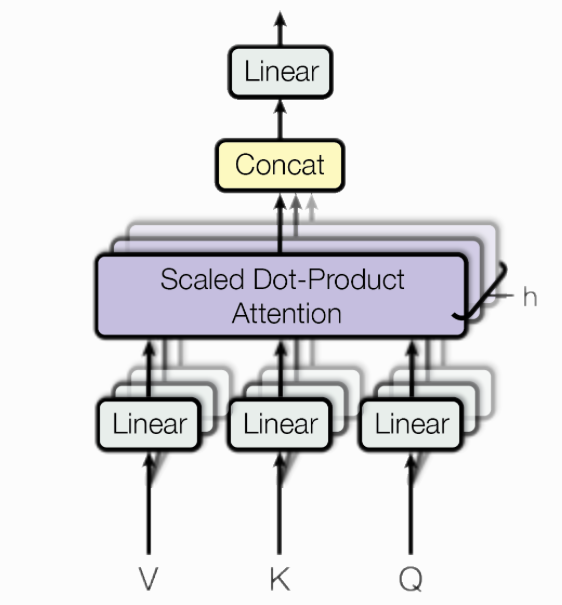

In [ ]:
class mha(torch.nn.Module):
    """
    Multi-head attention module
    """
    def __init__(self, embedding_dimension: int, num_heads: int):
        super(mha, self).__init__()
        
        # Variable init
        self.embedding_dimension = embedding_dimension
        self.num_heads = num_heads 
        self.depth = self.embedding_dimension // self.num_heads 
        
        # Projection matrix init 
        self.q_proj = torch.nn.Linear(self.embedding_dimension, self.embedding_dimension)
        self.k_proj = torch.nn.Linear(self.embedding_dimension, self.embedding_dimension)
        self.v_proj = torch.nn.Linear(self.embedding_dimension, self.embedding_dimension)
        
        
        # Final projection matrix 
        self.proj = torch.nn.Linear(self.embedding_dimension, self.embedding_dimension)
        
    def forward(self, queries, keys, values, mask=None):
        # Get batch size
        batch_size = keys.size(0)

        # Projection step
        # Your code here:
        queries = 
        keys = 
        values = 

        # Reshape
        # Your code here:
        queries = 
        keys = 
        values = 

        # Dot product
        values, attn = scaled_dot_product(keys, values, queries, mask)

        # Reshape again
        values = values.transpose(1, 2).contiguous().view(batch_size, -1, self.num_heads * self.depth)

        # Ouput
        # Your code here:
        out =

        return out


Question 3: Why do we use multi-head in the multi-head attention?


Question 4: What is the ouput sequence length equal to? Keys, queries or values?


### Transformer Encoder Layer

We are almost there. Now let us build the encoder layer! The encoder is illustrated by the figure below and highlighted by the red box. (Source: Ashish Vaswani et al.: Attention Is All You Need)

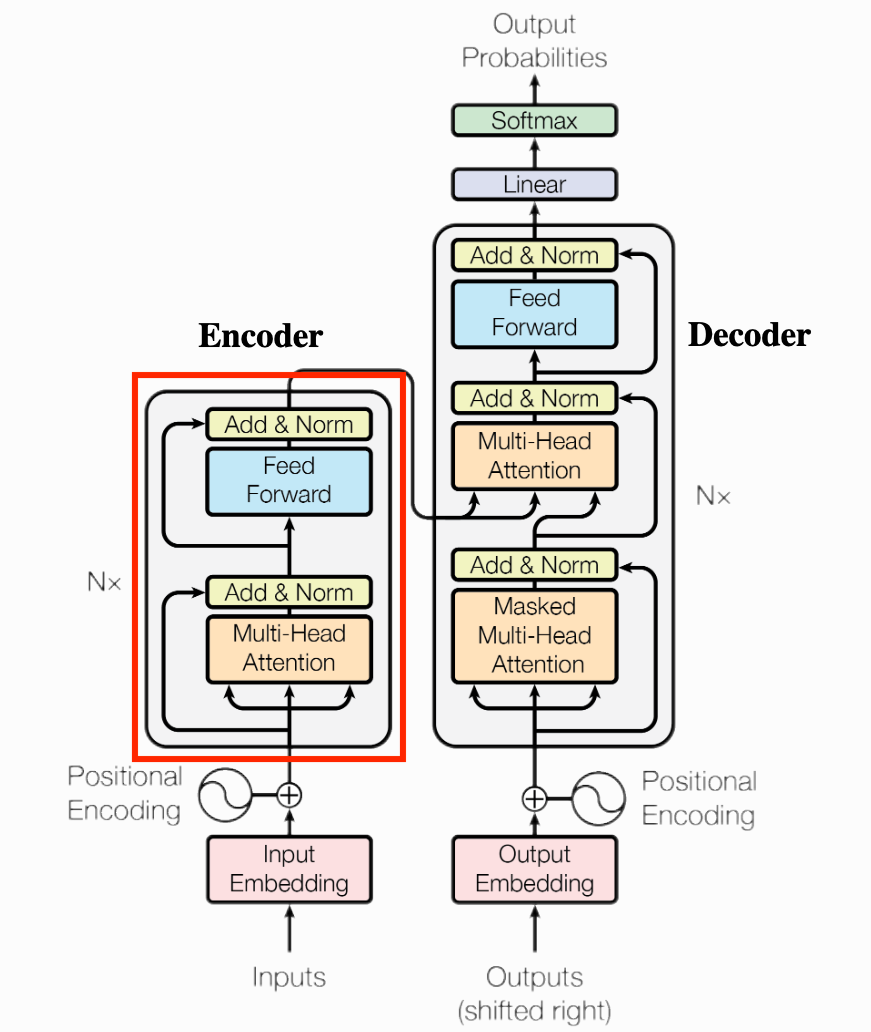

In [ ]:
class EncoderLayer(torch.nn.Module):
    """
    Encoder Layer
    """
    def __init__(self, embedding_dimension: int, num_heads: int, feed_forward_dim: int, dropout: float = 0.1):
        super(EncoderLayer, self).__init__()
        
        # Use the multi-head attention we implemented 
        self.mha = mha(embedding_dimension, num_heads)
        
        # LayerNorm 1 
        self.layernorm1 = torch.nn.LayerNorm(embedding_dimension)
        
        # Feedforward network
        self.feedforward = torch.nn.Sequential(
                        torch.nn.Linear(embedding_dimension, feed_forward_dim),
                        torch.nn.ReLU(),
                        torch.nn.Dropout(dropout),
                        torch.nn.Linear(feed_forward_dim, embedding_dimension)
        )
        
        # LayerNorm 2
        self.layernorm2 = torch.nn.LayerNorm(embedding_dimension)
        
        # Dropout
        self.dropout = torch.nn.Dropout(dropout)
        
    def forward(self, x, mask=None):
        # Multi-head attention
        # Your code here:
        att_output = 
        
        # Dropout and skip connections
        # Your code here:
        x = 
        
        # Linear norm 1
        # Your code here: 
        x =
        
        # Feedforward network
        # Your code here:
        ff_output = 
        
        # Dropout and skip connections
        # Your code here:
        x = 
        
        # Linear norm 2
        # Your code here:
        x = 
        
        return x

Question 5: Why do we use layer norm and not batchnorm?

Question 6: Why do we have a relu activation in the feedforward newtork?

### Transformer Decoder Layer

We are now only missing the decoder layer and then we can finally start implementing the transformer model! (Source: Ashish Vaswani et al.: Attention Is All You Need)

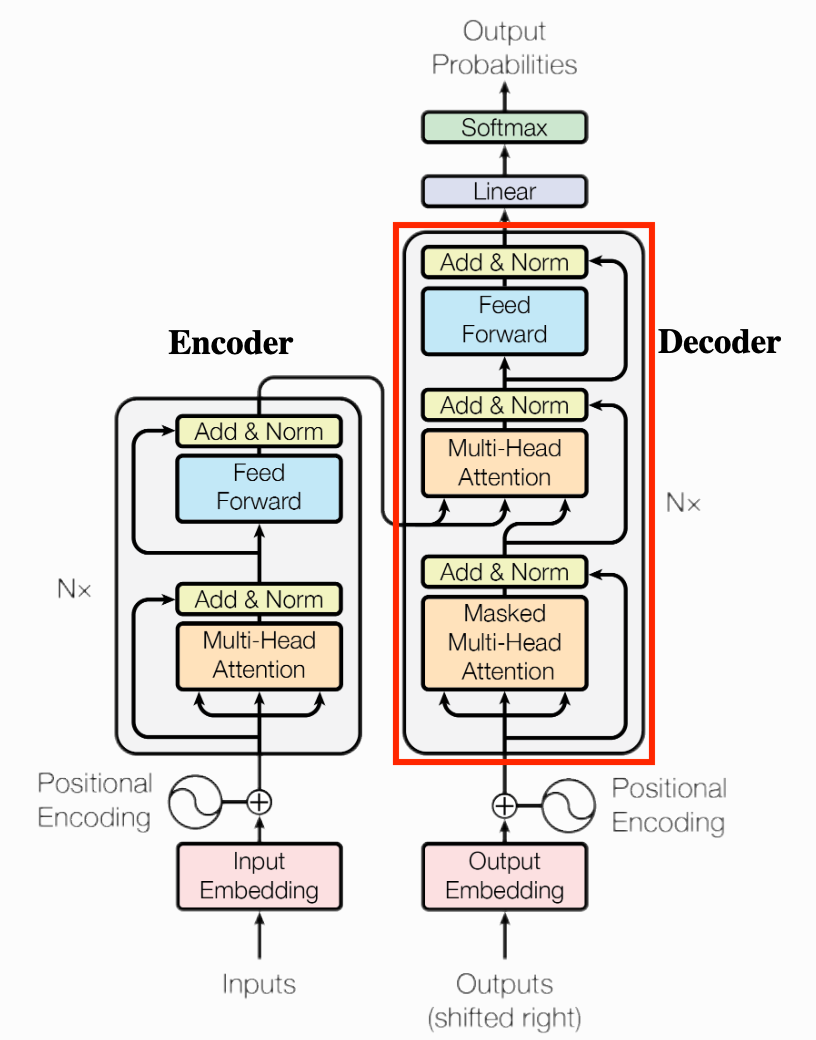

In [ ]:
class DecoderLayer(torch.nn.Module):
    """
    Decoder Layer
    """
    def __init__(self, embedding_dimension: int, num_heads: int, feed_forward_dim: int, dropout: float = 0.1):
        super(DecoderLayer, self).__init__()
        # Your code here (try to reuse as much code as possible from encoder layer but be careful as there differences):
        
    def forward(self, q, k, v, mask=None, causality_mask=None):
        # Your code here (try to reuse as much code as possible from encoder layer but be careful as there differences):
        
        

### Positional encoding 

Positional encoding in transformers addresses a fundamental difference in how they handle sequence data compared to Recurrent Neural Networks (RNNs). While RNNs inherently process sequences in a temporal order, thus naturally encoding the position of each element in the sequence, transformers do not have this built-in mechanism. This lack of intrinsic understanding of sequence order in transformers necessitates an alternative method to incorporate positional information.

In [ ]:
class PositionalEncoding(torch.nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()

        # Create a long enough 'pe' matrix
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x


### Transformer 

Now the time has come to implement the transformer model end-to-end!

In [ ]:
import math

class Transformer(torch.nn.Module):
    """
    Transformer Model
    """
    def __init__(self, n_encoders, n_decoders, source_vocab_size, target_vocab_size, embedding_dimension: int, 
                 num_heads: int, feed_forward_dim: int, dropout: float = 0.1):
        super(Transformer, self).__init__()
        # Define number of encoders and decoders
        self.num_encoders = n_encoders
        self.num_decoders = n_decoders
        
        # d_model
        self.d_model = embedding_dimension
        
        # First of all we need to embed the tokens to latent vectors
        self.encoder_embedding = torch.nn.Embedding(source_vocab_size, embedding_dimension)
        
        # Stack bunch of encoders 
        self.encoder_layers = torch.nn.ModuleList([EncoderLayer(embedding_dimension=embedding_dimension, 
                                                               num_heads=num_heads, 
                                                               feed_forward_dim=feed_forward_dim) for _ in range(n_encoders)])
        
        # Positional encoding 
        self.pos_encoder = PositionalEncoding(embedding_dimension)
        self.pos_decoder = PositionalEncoding(embedding_dimension)
        
        # Let us now embed the target tokens
        self.decoder_embedding = torch.nn.Embedding(target_vocab_size, embedding_dimension)
        
        # Stack bunch of decoders
        self.decoder_layers = torch.nn.ModuleList([DecoderLayer(embedding_dimension=embedding_dimension, 
                                                                num_heads=num_heads, 
                                                                feed_forward_dim=feed_forward_dim) for _ in range(n_decoders)])
        
        # Output layer
        self.out = torch.nn.Linear(embedding_dimension, target_vocab_size)
        
    def forward(self, source, target, mask=None, causality_mask=None):
        # Your code here:
        
        return final_prediction
        

### Masking 

We are almost there, let us not forget that we need to perform some masking. Padding masking is used to handle variable-length sequences in batch processing. Look-ahead masking, also known as future masking, is crucial in training autoregressive models where each output token is predicted based on previous tokens only.

Padding Mask:

In [ ]:
def create_padding_mask(seq):
    seq = torch.eq(seq, PAD_IDX)
    return seq.unsqueeze(1).unsqueeze(2)  

Look Ahead Mask:

In [ ]:
def create_look_ahead_mask(size):
    mask = torch.triu(torch.ones((size, size)), diagonal=1)
    return mask  

### Inference (autoregressive)

We need to write first the inference run. Keep in mind that Transformer are inherent next token predictor (autoregressive). We will employ greedy decoding!

In [ ]:
def remove_specific_values(tensor, values_to_remove):
    mask = torch.ones(tensor.size(), dtype=torch.bool)
    for value in values_to_remove:
        mask &= tensor != value
    return tensor[mask]

def translate(model, input_text, device, max_length=500):
    # Source 
    source_tokens = token_transform[SRC_LANGUAGE](input_text) 
    source_sentence = [BOS_IDX] + [vocab_transform[SRC_LANGUAGE][token] for token in source_tokens] + [EOS_IDX]
    source = torch.tensor(source_sentence).unsqueeze(0).to(device)
    
    # Target
    target = torch.tensor([BOS_IDX]).unsqueeze(0).to(device)
   
    # Autoregressive generation
    for _ in range(max_length):
        with torch.no_grad():
            output = model(source, target)

            next_token_id = output[:, -1, :].argmax(dim=-1).unsqueeze(-1)
        
        target = torch.cat([target, next_token_id], dim=-1)

        # Check if END_TOKEN is generated
        if EOS_IDX == next_token_id:
            break
    
    values_to_remove = [0, 1, 2, 3]
    cleaned_tensor = remove_specific_values(target.cpu(), values_to_remove)
    
    # Decode the output sequence to text
    output_text = " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(cleaned_tensor.cpu().numpy())))
    
    return output_text


### Training

Let us now implement the training loop ;-) 


In [ ]:
from tqdm import tqdm
from jiwer import cer
import random

source_vocab_size = len(vocab_transform[SRC_LANGUAGE])
target_vocab_size = len(vocab_transform[TGT_LANGUAGE])

# Init model
model = Transformer(n_encoders=3, n_decoders=3, source_vocab_size=source_vocab_size, target_vocab_size=target_vocab_size, embedding_dimension=192, num_heads=6, feed_forward_dim=192)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Define an optimizer Adam
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

# Move model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

num_epochs = 20
# Training loop
for epoch in range(num_epochs):
    # Set epoch loss to 0 at start of the epoch
    epoch_loss = 0
    
    # Iterate through each batch of the training set
    with tqdm(dataloader_train, unit="batch") as tepoch:
        for batch in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            
            # Set gradients to zero
            optimizer.zero_grad()
            
            # Batch is a tuple of (source, target)
            source, target = batch  
            
            # Padding and look-ahead mask
            padding_mask_encoder = create_padding_mask(source).to(device)
            look_ahead_mask = create_look_ahead_mask(target[:, :-1].size(1)).to(device)
        
            # Move data to the same device as model
            source = source.to(device)
            target = target.to(device)

            # Forward pass with teacher forcing
            output = model(source, target[:, :-1], mask=padding_mask_encoder, causality_mask=look_ahead_mask)

            # Compute the loss, skipping the first token of the target sequence
            loss = criterion(output.view(-1, target_vocab_size), target[:,1:].reshape(-1))

            # Backward pass and optimization 
            loss.backward()       
            optimizer.step()      
            
            epoch_loss += loss.item()
            tepoch.set_postfix(loss=loss.item())
        
        # Check sampling a sentence
        for _ in range(3):
            random_index = random.randint(0, len(X_test) - 1)
            sample_input = X_test[random_index]
            sample_output = Y_test[random_index]
            translated_sentence = translate(model, sample_input, device)
            print(f"SRC: {sample_input}")
            print(f"GT: {sample_output}")
            print(f"PRED: {translated_sentence}\n")

    avg_loss = epoch_loss / len(dataloader_train)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


### Evaluation 

Let us check the performance of the model in inference. Let us put the model to work right now!

In [ ]:
total_error = 0
for test_sample_src, test_sample_trg in zip(X_test, Y_test):
            translated_sentence = translate(model, test_sample_src, device)
            error = cer(test_sample_trg, translated_sentence)
            total_error = total_error + error

avg_error = total_error / len(X_test)
print(f"The average charactere level error is: {avg_error}!")

Continue training if needed! [Optional]

In [ ]:
# Insert the amount of more training here
num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    # Set epoch loss to 0 at start of the epoch
    epoch_loss = 0
    
    # Iterate through each batch of the training set
    with tqdm(dataloader_train, unit="batch") as tepoch:
        for batch in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            
            # Set gradients to zero
            optimizer.zero_grad()
            
            # Batch is a tuple of (source, target)
            source, target = batch  
            
            # Padding and look-ahead masks
            padding_mask_encoder = create_padding_mask(source)
            
            padding_mask_decoder = create_padding_mask(target[:, :-1])
            look_ahead_mask = create_look_ahead_mask(target[:, :-1].size(1))
            combined_mask = torch.maximum(padding_mask_decoder, look_ahead_mask)
        
            # Move data to the same device as model
            source = source.to(device)
            target = target.to(device)

            # Forward pass with teacher forcing
            output = model(source, target[:, :-1], mask=padding_mask_encoder, causality_mask=combined_mask)

            # Compute the loss, skipping the first token of the target sequence
            loss = criterion(output.view(-1, target_vocab_size), target[:,1:].reshape(-1))

            # Backward pass and optimization 
            loss.backward()       
            optimizer.step()      
            
            epoch_loss += loss.item()
            tepoch.set_postfix(loss=loss.item())
        
        # Check sampling a sentence
        for _ in range(3):
            random_index = random.randint(0, len(X_test) - 1)
            sample_input = X_test[random_index]
            sample_output = Y_test[random_index]
            translated_sentence = translate(model, sample_input)
            print(f"SRC: {sample_input}")
            print(f"GT: {sample_output}")
            print(f"PRED: {translated_sentence}\n")

    avg_loss = epoch_loss / len(dataloader_train)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Question X: What could you have done better ?

Acknwolegdment: Data from Anki [https://www.manythings.org/anki/]. Licence: CC-BY license (Creative Commons). Libraries used are sklearn, Pytorch, tokeinizer SpaCy etc.

Contributor(s): Emil Mededovic